In [14]:
#%% Importar librerias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
 

# Carga de datos

In [15]:
df_titanic = pd.read_csv('Titanic.csv')

df_titanic = df_titanic.drop(columns = 'PassengerId')

print(f"Las columnas son {df_titanic.columns}")
print(f"Las forma es {df_titanic.shape}")
print(f"Los datos faltantes son {df_titanic.isnull().sum()}")

Las columnas son Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Las forma es (891, 11)
Los datos faltantes son Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


# Tratamiento de datos

Los datos faltantes son 

Age         177

Cabin       687

Embarked      2


Age

In [16]:
# Primero, verifica los valores únicos en 'Age'
print("Valores únicos en 'Age':")
print(df_titanic['Age'].unique())

# Convierte a numérico, reemplazando errores con NaN
df_titanic['Age'] = pd.to_numeric(df_titanic['Age'], errors='coerce')

# Reemplaza los valores de edad 0 por NaN
df_titanic['Age'] = df_titanic['Age'].replace(0, np.nan)

# Verifica la cantidad de valores NaN
print(f"Valores NaN después de reemplazar 0: {df_titanic['Age'].isna().sum()}")

# Calcular la media excluyendo los NaN
mean_Age = df_titanic['Age'].mean()
print(f"Media de la columna 'Age': {mean_Age}")

# Llenar los valores NaN con la media calculada
df_titanic['Age'] = df_titanic['Age'].fillna(mean_Age)

# Convertir a tipo int64
df_titanic['Age'] = df_titanic['Age'].astype(np.float64)


Valores únicos en 'Age':
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Valores NaN después de reemplazar 0: 177
Media de la columna 'Age': 29.69911764705882


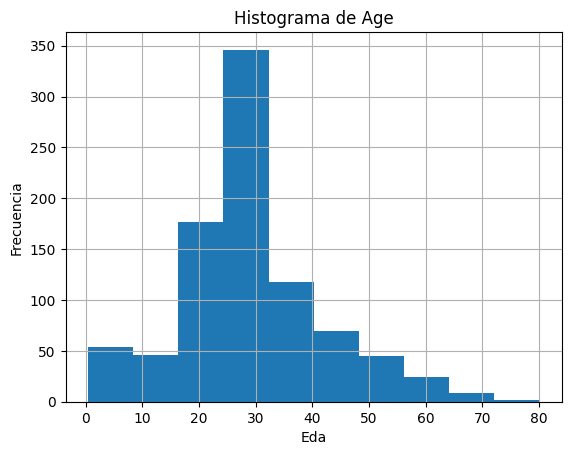

In [17]:
df_titanic['Age'].hist(bins=10)
plt.xlabel('Eda')
plt.ylabel('Frecuencia')
plt.title('Histograma de Age')
plt.show()

SibSp

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    3
8    0
9    1
Name: SibSp, dtype: int64
int64


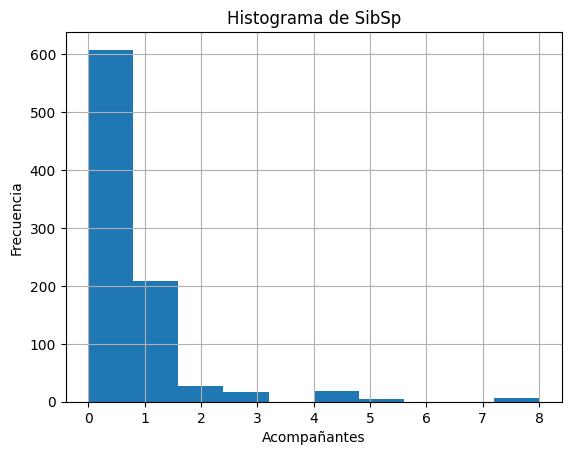

In [18]:
#SibSp
print(df_titanic['SibSp'].head(10))
print(df_titanic['SibSp'].dtype)

df_titanic['SibSp'].hist(bins=10)
plt.xlabel('Acompañantes')
plt.ylabel('Frecuencia')
plt.title('Histograma de SibSp')
plt.show()

Variables Name y Ticket

In [19]:
# Mostrar los valores de las columnas 'Name' y 'Ticket'
names_and_tickets = df_titanic[['Name', 'Ticket']]
print(names_and_tickets)

# Eliminar columnas no útiles para el análisis
df_titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)


                                                  Name            Ticket
0                              Braund, Mr. Owen Harris         A/5 21171
1    Cumings, Mrs. John Bradley (Florence Briggs Th...          PC 17599
2                               Heikkinen, Miss. Laina  STON/O2. 3101282
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)            113803
4                             Allen, Mr. William Henry            373450
..                                                 ...               ...
886                              Montvila, Rev. Juozas            211536
887                       Graham, Miss. Margaret Edith            112053
888           Johnston, Miss. Catherine Helen "Carrie"        W./C. 6607
889                              Behr, Mr. Karl Howell            111369
890                                Dooley, Mr. Patrick            370376

[891 rows x 2 columns]


Variable Embarked

In [20]:

# Llenar valores faltantes con el valor más frecuente en 'Embarked'
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

# Crear columnas dummy para cada categoría en 'Embarked'
df_titanic = pd.get_dummies(df_titanic, columns=['Embarked'], prefix='Embarked')







# Verificar el resultado
print(df_titanic.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  Embarked_C  \
0         0       3    male  22.0      1      0   7.2500   NaN       False   
1         1       1  female  38.0      1      0  71.2833   C85        True   
2         1       3  female  26.0      0      0   7.9250   NaN       False   
3         1       1  female  35.0      1      0  53.1000  C123       False   
4         0       3    male  35.0      0      0   8.0500   NaN       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


C:\Users\P\AppData\Local\Temp\ipykernel_25392\2974545522.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)


Variable Sex

In [21]:
# Convertir variable categórica a numérica
label_encoder_sex = LabelEncoder()

# Codificar columna 'Sex'
df_titanic['Sex'] = label_encoder_sex.fit_transform(df_titanic['Sex'])




Variable Fare

In [22]:
# Mostrar los valores de la columna 'Fare'
fare = df_titanic['Fare']
print(fare)
#Fare es la tarifa del pasajero

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64


Variable PClass

In [23]:
# Mostrar las filas donde 'Pclass' es nulo
pclass_null_rows = df_titanic[df_titanic['Pclass'].isnull()]
print(pclass_null_rows)

# Crear un scaler para normalizar entre 0 y 1
scaler = MinMaxScaler()

# Normalizar la columna 'PClass'
df_titanic['Pclass_normalized'] = scaler.fit_transform(df_titanic[['Pclass']])

# Mostrar el resultado
df_titanic[['Pclass', 'Pclass_normalized']]

# Eliminar la columna 'Pclass'
df_titanic.drop('Pclass', axis=1, inplace=True)

Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Cabin, Embarked_C, Embarked_Q, Embarked_S]
Index: []


Variable Parch

In [24]:
# Mostrar los valores únicos de la columna 'Parch'
parch_unique_values = df_titanic['Parch'].unique()
print(parch_unique_values)

# Mostrar las filas donde 'Parch' es nulo
parchnull_rows = df_titanic[df_titanic['Parch'].isnull()]
print(parchnull_rows)

# Normalizar la columna 'Parch' utilizando Min-Max Scaling
df_titanic['Parch_normalized'] = scaler.fit_transform(df_titanic[['Parch']])

# Mostrar el DataFrame con la columna normalizada
print(df_titanic[['Parch', 'Parch_normalized']])

# Eliminar la columna 'Parch'
df_titanic.drop('Parch', axis=1, inplace=True)



[0 1 2 5 3 4 6]
Empty DataFrame
Columns: [Survived, Sex, Age, SibSp, Parch, Fare, Cabin, Embarked_C, Embarked_Q, Embarked_S, Pclass_normalized]
Index: []
     Parch  Parch_normalized
0        0          0.000000
1        0          0.000000
2        0          0.000000
3        0          0.000000
4        0          0.000000
..     ...               ...
886      0          0.000000
887      0          0.000000
888      2          0.333333
889      0          0.000000
890      0          0.000000

[891 rows x 2 columns]


In [25]:
print(df_titanic.columns)
print(df_titanic)
df_titanic.drop('Cabin', axis=1, inplace=True)
print(df_titanic.columns)

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Fare', 'Cabin', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_normalized', 'Parch_normalized'],
      dtype='object')
     Survived  Sex        Age  SibSp     Fare Cabin  Embarked_C  Embarked_Q  \
0           0    1  22.000000      1   7.2500   NaN       False       False   
1           1    0  38.000000      1  71.2833   C85        True       False   
2           1    0  26.000000      0   7.9250   NaN       False       False   
3           1    0  35.000000      1  53.1000  C123       False       False   
4           0    1  35.000000      0   8.0500   NaN       False       False   
..        ...  ...        ...    ...      ...   ...         ...         ...   
886         0    1  27.000000      0  13.0000   NaN       False       False   
887         1    0  19.000000      0  30.0000   B42       False       False   
888         0    0  29.699118      1  23.4500   NaN       False       False   
889         1    1  26.000000      0  

In [26]:


#%% Normalizar los datos Age, SibSp, Embarked
df_titanic_norm = df_titanic

#Normalizamos las variables numericas
scaler = StandardScaler()
df_titanic_norm['Age_norm'] = scaler.fit_transform(df_titanic[['Age']])
df_titanic_norm['SibSp_norm'] = scaler.fit_transform(df_titanic[['SibSp']])
df_titanic_norm['Fare_norm'] = scaler.fit_transform(df_titanic[['Fare']])
df_titanic_norm['Embarked_C_norm'] = scaler.fit_transform(df_titanic[['Embarked_C']])
df_titanic_norm['Embarked_Q_norm'] = scaler.fit_transform(df_titanic[['Embarked_Q']])
df_titanic_norm['Embarked_S_norm'] = scaler.fit_transform(df_titanic[['Embarked_S']])


#%% Dropeamos las tablas sin normalizar
df_titanic.drop('Age', axis=1, inplace=True)
df_titanic.drop('SibSp', axis=1, inplace=True)
df_titanic.drop('Fare', axis=1, inplace=True)
df_titanic.drop('Embarked_C', axis=1, inplace=True)
df_titanic.drop('Embarked_Q', axis=1, inplace=True)
df_titanic.drop('Embarked_S', axis=1, inplace=True)


In [27]:
print(df_titanic_norm.columns)
print(df_titanic_norm)

Index(['Survived', 'Sex', 'Pclass_normalized', 'Parch_normalized', 'Age_norm',
       'SibSp_norm', 'Fare_norm', 'Embarked_C_norm', 'Embarked_Q_norm',
       'Embarked_S_norm'],
      dtype='object')
     Survived  Sex  Pclass_normalized  Parch_normalized  Age_norm  SibSp_norm  \
0           0    1                1.0          0.000000 -0.592481    0.432793   
1           1    0                0.0          0.000000  0.638789    0.432793   
2           1    0                1.0          0.000000 -0.284663   -0.474545   
3           1    0                0.0          0.000000  0.407926    0.432793   
4           0    1                1.0          0.000000  0.407926   -0.474545   
..        ...  ...                ...               ...       ...         ...   
886         0    1                0.5          0.000000 -0.207709   -0.474545   
887         1    0                0.0          0.000000 -0.823344   -0.474545   
888         0    0                1.0          0.333333  0.000000    0.

In [28]:
import matplotlib.pyplot as plt
import os

# Directorio donde se guardarán los histogramas
output_dir = "histogramas_var_normalizadas"
os.makedirs(output_dir, exist_ok=True)  # Crea el directorio si no existe
valores_discretos = ['Survived', 'Sex', 'Pclass_normalized', 'Parch_normalized', 'Age_norm',
       'SibSp_norm', 'Embarked_C_norm','Embarked_Q_norm','Embarked_S_norm', 'Fare_norm']


for column in valores_discretos:
    try:
        value_counts = df_titanic_norm[column].value_counts()

        plt.rcParams['font.family'] = 'Arial'
        plt.figure(figsize=(16, 14))
        plt.barh(value_counts.index, value_counts.values)
        plt.title(f'Histograma de {column}')
        plt.xlabel('Frecuencia')
        plt.ylabel(column)

        # Ruta completa del archivo de salida
        output_file = os.path.join(output_dir, f"histograma_{column}.png")
        plt.savefig(output_file)  # Guardar el gráfico en un archivo
        plt.close()  # Cerrar la figura para liberar memoria
    
    except Exception as e:
        print(f"Error al procesar la columna {column}: {e}")

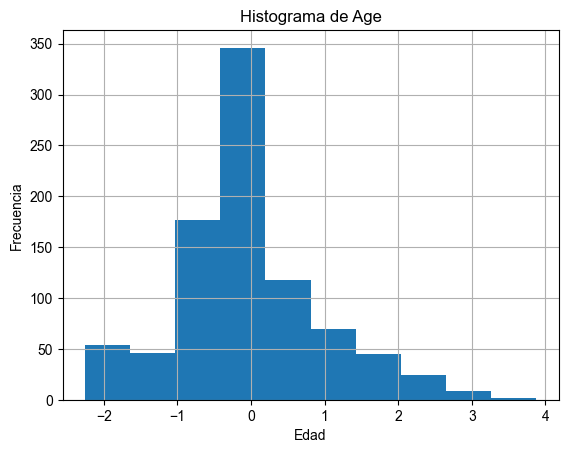

In [29]:
df_titanic['Age_norm'].hist(bins=10)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Age')
plt.show()

# Analisis de componentes

In [30]:
print(df_titanic_norm.columns)
df_sobrevivientes = df_titanic_norm['Survived']

df_titanic_norm.drop('Survived', axis=1, inplace=True)

Index(['Survived', 'Sex', 'Pclass_normalized', 'Parch_normalized', 'Age_norm',
       'SibSp_norm', 'Fare_norm', 'Embarked_C_norm', 'Embarked_Q_norm',
       'Embarked_S_norm'],
      dtype='object')


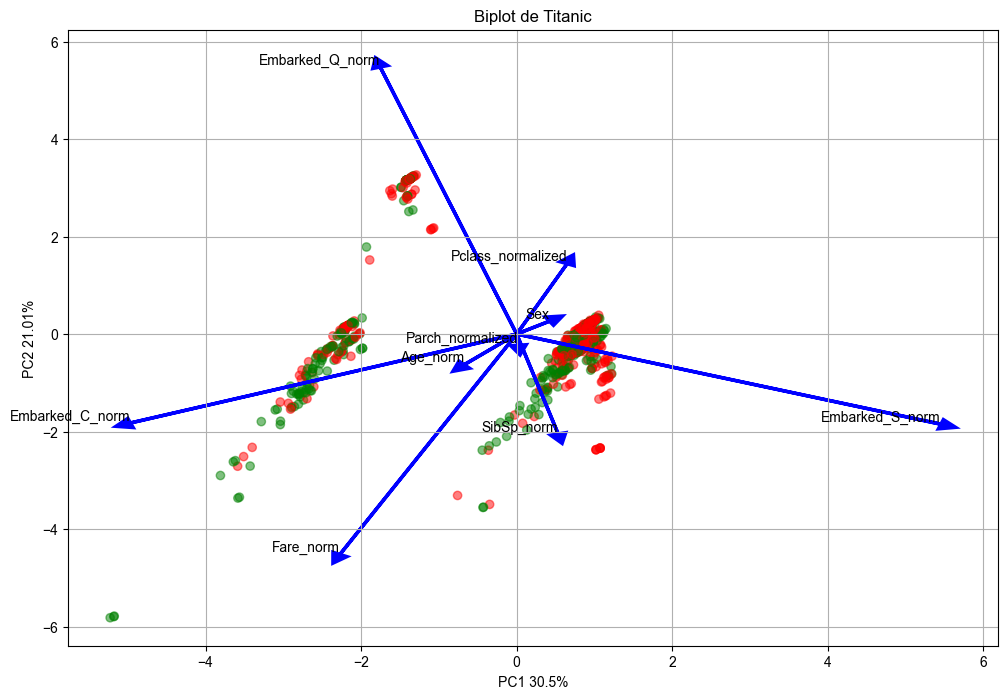

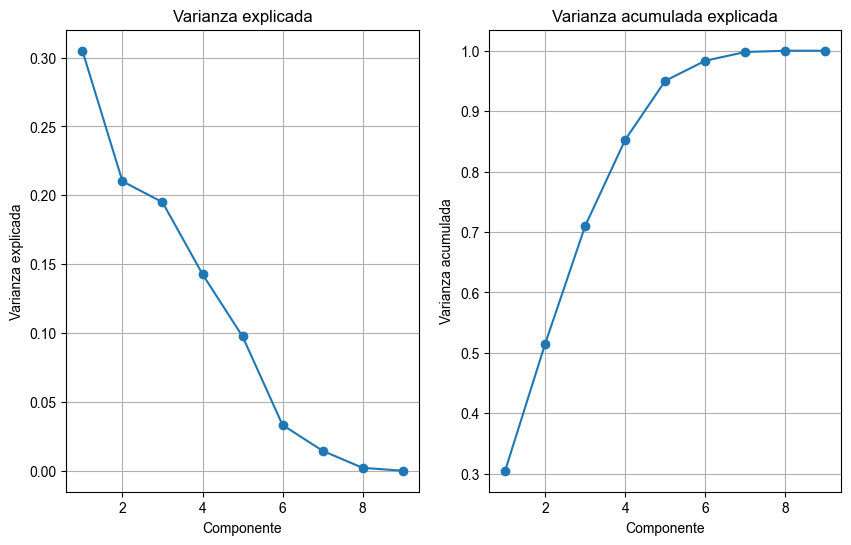

In [35]:
#%% Crear objeto PCA


pca = PCA(n_components = 9) #9 porque sacamos la de Survived

#%% Ajustar y transformar los datos
pca_titanic = pca.fit_transform(df_titanic_norm)

#%% Crear dataframe con los datos transformados
df_pca_titanic = pd.DataFrame(data = pca_titanic, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

#%% Realizar biplot mostrando los componentes principales y las variables originales
def biplot(etiquetas, columnas, df_pca, pca, componente_x, componente_y, title = 'Biplot', incluir_nombres = False):
    plt.figure(figsize = (12, 8))
    pcx_txt = f'PC{componente_x}'
    pcy_txt = f'PC{componente_y}'

    survived_colors = ['red' if val == 0 else 'green' for val in etiquetas]  # 0 en rojo, 1 en verde
    plt.scatter(df_pca[pcx_txt], df_pca[pcy_txt], alpha = 0.5, c=survived_colors)
    
    plt.title(title)
    plt.xlabel(f'{pcx_txt} {round(pca.explained_variance_ratio_[componente_x-1] * 100, 2)}%')
    plt.ylabel(f'{pcy_txt} {round(pca.explained_variance_ratio_[componente_y-1] * 100, 2)}%')
    for i, (pc1, pc2) in enumerate(zip(pca.components_[componente_x-1], pca.components_[componente_y-1])):
    # Aumentar tamaño de flechas
        pc1 *= 8
        pc2 *= 8
        plt.arrow(0, 0, pc1, pc2, head_width = 0.2, head_length = 0.2, linewidth = 2.5, color = 'blue')
        plt.text(pc1, pc2, columnas[i], color = 'black', ha = 'right', va = 'bottom')  # Cambiado i+1 por i

    # Mostrar el nombre en cada punto
    if incluir_nombres:
        for i, nombre in enumerate(etiquetas):
            plt.text(df_pca[pcx_txt][i], df_pca[pcy_txt][i], nombre, color = 'blue', ha = 'left', va = 'bottom')
    plt.grid()
    plt.show()

#%% Graficar biplot
biplot(df_sobrevivientes, df_titanic_norm.columns, df_pca_titanic, pca, componente_x = 1, componente_y = 2, title = 'Biplot de Titanic', incluir_nombres = False)

# %% Graficar la varianza explicada y acumulada en un único gráfico formado por dos subgráficos
plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker = 'o')
plt.title('Varianza explicada')
plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.title('Varianza acumulada explicada')
plt.xlabel('Componente')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

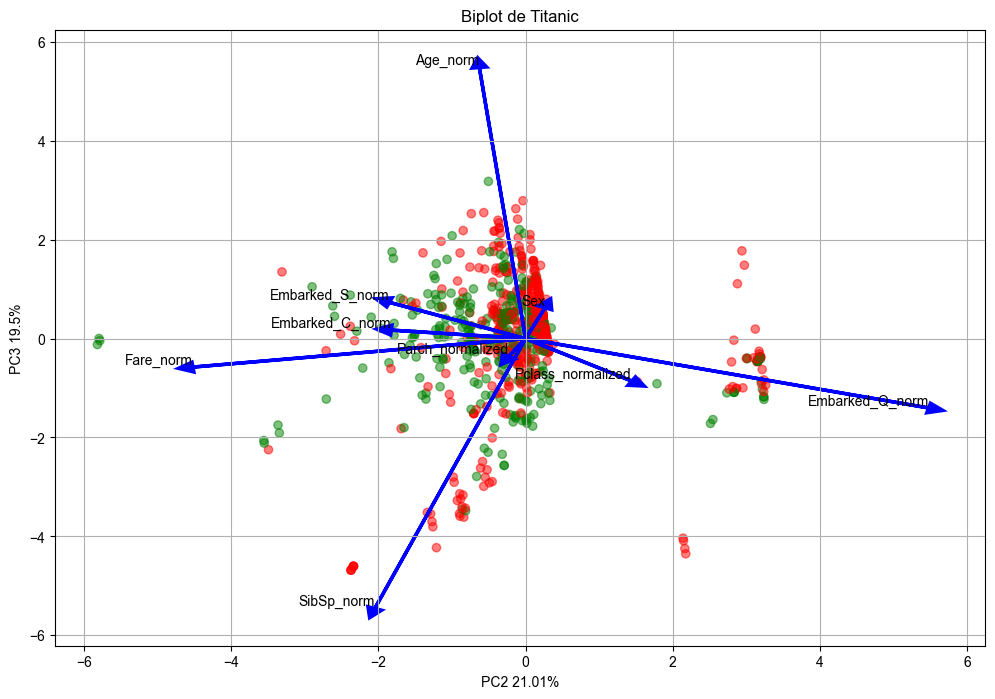

In [37]:
biplot(df_sobrevivientes, df_titanic_norm.columns, df_pca_titanic, pca, componente_x = 2, componente_y = 3, title = 'Biplot de Titanic', incluir_nombres = False)
